# Movimiento potencial

## Movimientos potenciales simples
A continuación se listan una serie de movimientos potenciales simples, en conjunto con las expresiones de sus funciones de corriente y potencial, y las componentes del campo de velocidades que determinan. Dado que la deducción de la mayoría de las expresiones se aborda en los apuntes teóricos, solamente se desarrollará el caso del dipolo.

<a id='tabla1'></a>

| **Descripción** | **Función potencial y de corriente** | **Componentes** |
| :--- | :---: | :---: |
| **Flujo uniforme** <br> (con $\alpha$ con respecto al eje $x$) | $\phi = U_{0}(xcos\alpha + ysin\alpha)$ <br> $\psi = U_{0}(xcos\alpha + ysin\alpha)$ | $ u = U_{0}cos\alpha$ <br> $v = U_{0}sin\alpha$ |
| **Fuente** ($\sigma>0$) <br> **Sumidero** ($\sigma<0$) | $\phi = \frac{\sigma}{2\pi}lnr$ <br> $\psi=\frac{\sigma}{2\pi}\theta$ | $v_{r}=\frac{\sigma}{2\pi r}$ <br> $v_{\theta}=0$ |
| **Torbellino** <br> ($\Gamma<0$ antihorario) <br> ($\Gamma>0$ horario)| $\phi = \frac{\Gamma}{2\pi}ln\theta$ <br> $\psi = \frac{\Gamma}{2\pi}lnr$ | $v_{r}=0$ <br> $v_{\theta}=\frac{\Gamma}{2\pi r}$ |
| **Dipolo** | $\phi = \frac{\kappa}{2\pi} \frac{x}{x^2+y^2}$ <br> $\psi=\frac{-\kappa}{2\pi} \frac{sen\theta}{r}$ | $u =  -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$ <br> $v = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$ |

Para cada uno de los movimientos listados se generaron gráficos interactivos que presentan el campo de velocidades en color gris y, al clickear en un punto, la línea equipotencial (anaranjado) y de corriente (azul) que pasa por dicho punto.

Asimismo, la ejecución de la celda inferior a cada gráfico devuelve los valores de las equipotenciales, líneas de corriente y coordenadas relativas a cada punto seleccionado.


### Flujo uniforme
Se considera un escurrimiento paralelo que forma un ángulo $\alpha$ con el eje $x$. El campo de velocidades queda expresado por las componentes $u$ y $v$.

$$ u = U_{0}cos\alpha \quad \text{;} \quad v = U_{0}sin\alpha $$

Por otro lado, las funciones de corriente y potencial resultan

$$\phi = U_{0}(xcos\alpha + ysin\alpha)$$
$$\psi = U_{0}(xcos\alpha + ysin\alpha)$$

In [26]:
# Importación de librerías
%matplotlib nbagg
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [27]:
# Constantes
U0 = 1.5
alpha = np.pi*(45/180)

In [28]:
# Definición del campo de velocidades
# Generación de la grilla de graficación
x=np.linspace(0,5,25); y=np.linspace(0,5,25)
X,Y=np.meshgrid(x,y)

# Cálculo del campo de velocidades
u = U0*np.cos(alpha)*np.ones(X.shape)
v = U0*np.sin(alpha)*np.ones(Y.shape)

<IPython.core.display.Javascript object>


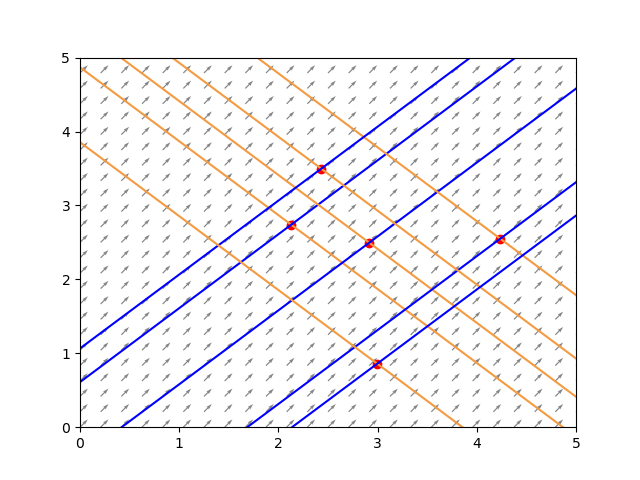

In [29]:
# Graficación
f,a = plt.subplots()
a.axis([0, 5, 0, 5])
a.quiver(X,Y,u,v, color='#848587')

cols = ['x','y','phi','psi']
lst = []
def onclick(event):
    phi = U0*(event.xdata*np.cos(alpha) + event.ydata*np.sin(alpha))
    psi = U0*(event.ydata*np.cos(alpha) - event.xdata*np.sin(alpha))
    output.append([event.xdata,event.ydata,phi,psi])
    a.plot(event.xdata,event.ydata,'ro')
    a.plot(x,phi/(U0*np.sin(alpha))*np.ones(x.shape)-(1/np.tan(alpha))*x,color='#f49b42')
    a.plot(x,psi/(U0*np.cos(alpha))*np.ones(x.shape)+(np.tan(alpha))*x,'b-')
    lst.append([event.xdata, event.ydata, phi, psi])
f.canvas.mpl_connect('button_press_event', onclick)
f.show()

In [30]:
output = pd.DataFrame(lst,columns=cols)
display(output)

,x,y,phi,psi
0,2.129379,2.739617,5.164350,0.647256
1,2.915669,2.496111,5.740059,-0.445009
2,4.236234,2.550223,7.198124,-1.788284
3,2.431798,3.497193,6.288645,1.130022
4,2.996314,0.859206,4.089397,-2.266746


### Fuente o sumidero
En este caso el escurrimiento presenta un aporte (fuente) o déficit (sumidero) puntual de un caudal unitario $\sigma$. Las componentes del vector velocidad, en coordenadas polares, son:

$$ v_{r}=\frac{\sigma}{2\pi r} \quad \text{;} \quad v_{\theta}=0 $$

Además, las funciones de corriente y potencial resultan:

$$ \phi = \frac{\sigma}{2\pi} lnr \quad \text{;} \quad \psi=\frac{\sigma}{2\pi}\theta $$

In [31]:
# Constantes
sigma = 1.5

In [32]:
# Definición del campo de velocidades
# Generación de vectores de graficación
r = np.linspace(0.001,5,2); theta = np.linspace(-1,1,5000)*np.pi

# Generación de grilla
rv = np.linspace(0.001,5,10); thetav = np.linspace(0,2*np.pi,19)
R,THETA = np.meshgrid(rv,thetav)

# Cálculo del campo de velocidades
vr = sigma/(2*np.pi*R) # Componente radial de la velocidad
vt = 0 # Componente en theta de la velocidad

<IPython.core.display.Javascript object>


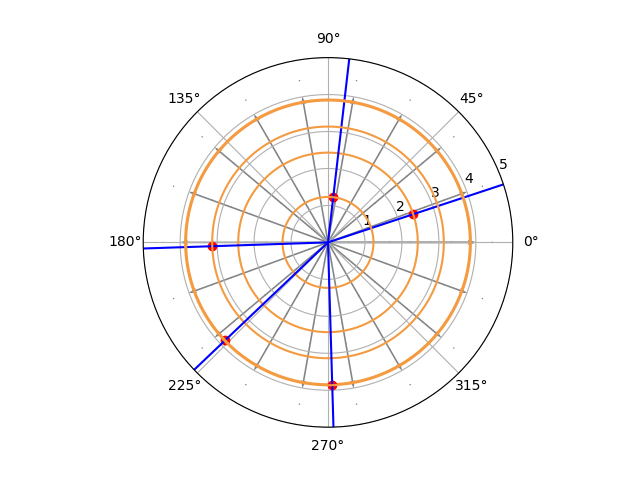

In [33]:
# Graficación
f,a = plt.subplots(1,1,subplot_kw=dict(polar=True))
a.quiver(THETA,
         R,
         vr * np.cos(THETA) - vt * np.sin(THETA),
         vr * np.sin(THETA) + vt * np.cos(THETA),
         color='#848587')
a.set_ylim(0,5)

cols = ['r','theta','phi','psi']
lst = []
def onclick(event):
    output.append([event.xdata,event.ydata])
    phi = (sigma/(2*np.pi))*np.log(event.ydata)
    psi = (sigma/(2*np.pi))*event.xdata
    a.plot(event.xdata,event.ydata,'ro')
    a.plot((psi/(sigma/(2*np.pi)))*np.ones(r.shape),r,'-b')
    a.plot(theta,np.exp(phi/(sigma/(2*np.pi)))*np.ones(theta.shape),'#f49b42')
    lst.append([event.ydata, event.xdata, phi, psi])
f.canvas.mpl_connect('button_press_event', onclick)
f.show()

In [38]:
output = pd.DataFrame(lst,columns=cols)
display(output)

,r,theta,phi,psi


### Torbellino
En este caso los vectores velocidad son tangentes a circunferencias concéntricas, y su magnitud decrece al alejarse del centro. El signo de la constante $\Gamma$ determina el sentido de rotación. Valores positivos de $\Gamma$ dan como resultado un sentido horario, mientras que los negativos propicial el sentido antihorario.

El campo de velocidad queda determinado, en coordenadas polares, por las componentes:

$$ v_{r}=0 \quad \text{;} \quad v_{\theta}=\frac{\Gamma}{2\pi r} $$

Mientras que las funciones de corriente y potencial son:

$$ \phi = \frac{\Gamma}{2\pi} \theta \quad \text{;} \quad \psi = \frac{\Gamma}{2\pi} lnr $$

In [10]:
# Constantes
Gamma = 1.5

In [11]:
# Definición del campo de velocidades
# Generación de vectores de graficación
r = np.linspace(0.001,5,2); theta = np.linspace(-1,1,5000)*np.pi

# Generación de grilla
rv = np.linspace(1,5,10); thetav = np.linspace(0,2*np.pi,20)
R,THETA = np.meshgrid(rv,thetav)

# Cálculo del campo de velocidades
vr = 0 # Componente radial de la velocidad
vt = (Gamma/2*np.pi)/R # Componente en theta de la velocidad

<IPython.core.display.Javascript object>


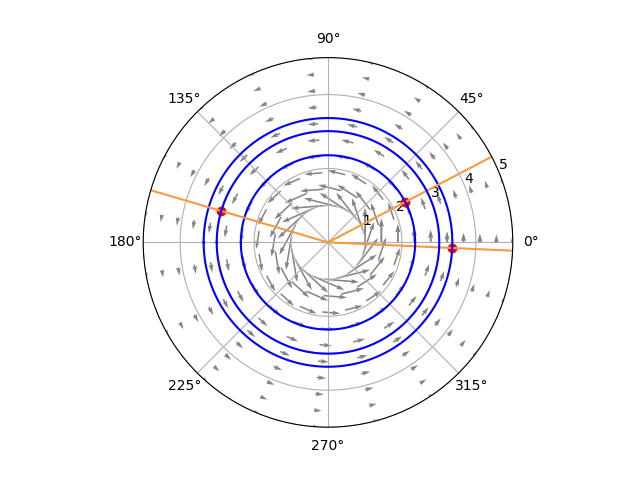

In [12]:
# Graficación
f,a = plt.subplots(1,1,subplot_kw=dict(polar=True))
a.quiver(THETA,
         R,
         vr * np.cos(THETA) - vt * np.sin(THETA),
         vr * np.sin(THETA) + vt * np.cos(THETA),
         color='#848587')
a.set_ylim(0,5)

cols = ['r','theta','phi','psi']
lst = []
def onclick(event):
    output.append([event.xdata,event.ydata])
    psi = (Gamma/(2*np.pi))*np.log(event.ydata)
    phi = (Gamma/(2*np.pi))*event.xdata
    a.plot(event.xdata,event.ydata,'ro')
    a.plot((phi/(Gamma/(2*np.pi)))*np.ones(r.shape),r,'#f49b42')
    a.plot(theta,np.exp(psi/(Gamma/(2*np.pi)))*np.ones(theta.shape),'-b')
    lst.append([event.ydata, event.xdata, phi, psi])
f.canvas.mpl_connect('button_press_event', onclick)
f.show()

In [42]:
output = pd.DataFrame(lst,columns=cols)
display(output)

,r,theta,phi,psi


### Dipolo
_El siguiente desarrollo es una adaptación de la_ [Lección 3](https://nbviewer.jupyter.org/github/barbagroup/AeroPython/blob/master/lessons/03_Lesson03_doublet.ipynb) _de_ [AeroPython](https://github.com/barbagroup/AeroPython)_, material que forma parte del curso Aerodynamics-Hydrodynamics (MAE-6226) dictado por la Prof. Lorena A. Barba en la George Washington University._

Se considera un par fuente-sumidero (de intensidades $\sigma$ y -$\sigma$ respectivamente) separados una distancia $l$, tal y como se esquematiza en la imagen siguiente ([Fuente](https://github.com/barbagroup/AeroPython)). 

![doublet](doubletSketch1.png)

En este caso las funciones de corriente y potencial evaluadas en un punto $\text{P}\left(x,y\right)$ son:


$$\psi\left(x,y\right) = \frac{\sigma}{2\pi}\left(\theta_1-\theta_2\right) = -\frac{\sigma}{2\pi}\Delta\theta$$

$$\phi\left(x,y\right) = \frac{\sigma}{2\pi}\left(lnr-lnb\right) $$


Luego, consideremos que la distancia $l$ entre las singularidades disminuye mientras la magnitud de intensidad $\sigma$ aumenta para mantener el producto $\sigma l$ constante. En el limite $l \to 0$ el patrón de flujo resulante se denomina dipolo, y su intensidad se define como $\kappa = \sigma l$.

Las funciones de corriente y potencial de un doblete, evaluadas en un punto $\text{P}\left(x,y\right)$, vienen dadas por:

$$\psi\left(x,y\right) = \lim \limits_{l \to 0} \left(-\frac{\sigma}{2\pi}d\theta\right)$$

$$\phi\left(x,y\right) = \lim \limits_{l \to 0} \frac{\sigma}{2\pi}\left(lnr-lnb\right)$$

$$\text{con } \sigma l = \text{constante}$$



![doublet2](doubletSketch2.png)

Considerando el caso en donde $d\theta$ es infinitesimal, puede deducirse de la figura ([Fuente](https://github.com/barbagroup/AeroPython)) superior:

$$a = l\sin\theta$$

$$b = r-l\cos\theta$$

$$d\theta = \frac{a}{b} = \frac{l\sin\theta}{r-l\cos\theta}$$

De modo que la función de corriente resulta:

$$\psi\left(r,\theta\right) = \lim \limits_{l \to 0} \left(-\frac{\sigma l}{2\pi}\frac{\sin\theta}{r-l\cos\theta}\right) \quad \text{y} \quad \sigma l = \text{constante}$$

Es decir:

$$\psi\left(r,\theta\right) = -\frac{\kappa}{2\pi}\frac{\sin\theta}{r}$$

Con el objetivo de facilitar la graficación se expresa la función de corriente en coordenadas cartesianas:

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$

Por otro lado, la expresión para la función potencial resulta:

$$\phi \left(x,y\right) = \lim \limits_{l \to 0} \frac{\sigma l}{2\pi}\frac{lnr-lnb}{l}$$

Dado que $\sigma l = \kappa = \text{constante}$, y que $\lim \limits_{l \to 0} \frac{lnr-lnb}{l}$ no es más que la derivada de $lnr$ con respecto a $x$, la expresión anterior puede reducirse a:

$$\phi \left(x,y\right) = \frac{\kappa}{2\pi} \lim \limits_{l \to 0} \frac{lnr-lnb}{l}$$

$$\phi \left(x,y\right) = \frac{\kappa}{2\pi} \lim \frac{d(lnr)}{dx}$$

Luego, teniendo en cuenta que $r=\sqrt{x^2+y^2}$, resulta:

$$\frac{d(lnr)}{dx} = \frac{d}{dx} ln(\sqrt{x^2+y^2}) = \frac{x}{x^2+y^2}$$

De modo que la función potencial del dipolo evaluada en un punto $\text{P}\left(x,y\right)$ resulta:

$$\phi \left(x,y\right) = \frac{\kappa}{2\pi} \frac{x}{x^2+y^2}$$

De donde pueden deducirse las componentes del campo de velocidades:

$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

In [34]:
# Constantes
kappa = 1

In [35]:
# Definición del campo de velocidades
# Generación de la grilla de graficación
x=np.linspace(-10,10,100000); y=np.linspace(-10,10,100000)
xg=np.linspace(-10,10,100); yg=np.linspace(-10,10,100)
X,Y=np.meshgrid(xg,yg)

# Cálculo del campo de velocidades    
u = (- kappa / (2 * np.pi) * ((X )**2 - (Y )**2) / ((X )**2 + (Y )**2)**2)
v = (- kappa / (2 * np.pi) * 2 * (X ) * (Y ) / ((X )**2 + (Y )**2)**2)

<IPython.core.display.Javascript object>


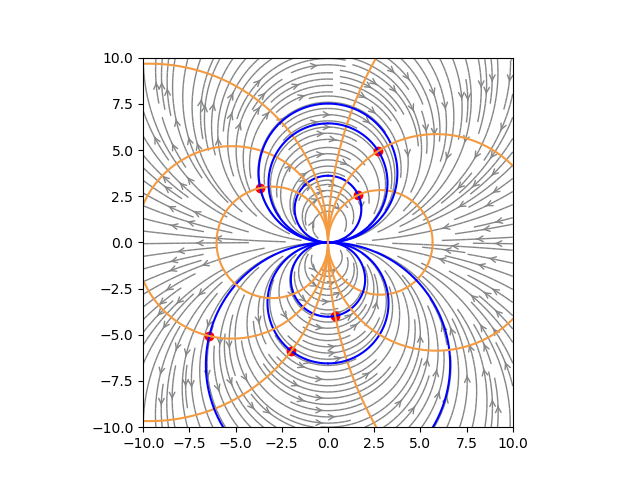

In [36]:
f,a = plt.subplots()
a.axis([-10, 10, -10, 10])
a.set_aspect('equal')
a.streamplot(X,Y,u,v,
             density = 2,
             linewidth = 1,
             arrowstyle = '->',
             color='#848587')

cols = ['x','y','phi','psi']
lst = []
def onclick(event):
    phi = (- kappa / (2 * np.pi) ) * (event.xdata / (event.xdata**2 + event.ydata**2))
    psi = (- kappa / (2 * np.pi) ) * (event.ydata / (event.xdata**2 + event.ydata**2))
    a.plot(event.xdata,event.ydata,'ro')
    a.plot(-np.sqrt( - y**2 - ( kappa /(2 * np.pi)) * (y / psi)),y, '-b')
    a.plot(+np.sqrt( - y**2 - ( kappa /(2 * np.pi)) * (y / psi)),y, '-b')
    a.plot(x,-np.sqrt( - y**2 - ( kappa /(2 * np.pi)) * (x / phi)), '#f49b42')
    a.plot(x,+np.sqrt( - y**2 - ( kappa /(2 * np.pi)) * (x / phi)), '#f49b42')
    lst.append([event.xdata, event.ydata, phi , psi])
f.canvas.mpl_connect('button_press_event', onclick)
f.show()

In [37]:
output = pd.DataFrame(lst,columns=cols)
display(output)

,x,y,phi,psi
0,1.636059,2.565781,-0.028120,-0.044099
1,0.391471,-3.981838,-0.003892,0.039588
2,-1.989482,-5.875778,0.008228,0.024301
3,-6.426711,-5.064090,0.015278,0.012039
4,-3.666971,2.944568,0.026388,-0.021189
5,2.718310,4.946733,-0.013579,-0.024712


## Superposición de movimientos potenciales simples
En esta sección se hará uso de la propiedad de superposición de los flujos potenciales. La misma enuncia que el resultante de la adición de dos flujos potenciales es un nuveo flujo potencial.

Dicho esto, la adición de flujos simples como los presentados anteriomente permite representar casos de interés práctico, como el escurrimiento alrededor de obstáculos o patrones que se presentan habitualmente.

### Torbellino espiral
El torbellino espiral es el resultado de la adición de un torbellino y un sumidero.

$$\psi = \psi_{torbellino} + \psi_{sumidero} = -\frac{\sigma}{2\pi} \theta - \frac{\Gamma}{2\pi} lnr  $$

$$\phi = \phi_{torbellino} + \phi_{sumidero} = -\sigma lnr + \Gamma \theta$$

Las componentes del vector velocidad también pueden obtenerse por adición (ver [Tabla](#tabla1)):

$$v_{r} = v_{r torbellino} + v_{r sumidero} = -\frac{\sigma}{2\pi r} $$

$$v_{\theta} = v_{\theta torbellino} + v_{\theta sumidero} = \frac{\Gamma}{2\pi r} $$

In [23]:
# Constantes
sigma = 1.5
Gamma = 1.5

In [24]:
# Definición del campo de velocidades
# Generación de vectores de graficación
r = np.linspace(0.001,5,500); theta = np.linspace(-1,1,500)*np.pi

# Generación de grilla
rv = np.linspace(1,5,10); thetav = np.linspace(0,2*np.pi,20)
R,THETA = np.meshgrid(rv,thetav)

# Cálculo del campo de velocidades
vr = (-sigma/(2*np.pi))/R # Componente radial de la velocidad
vt = (Gamma/(2*np.pi))/R # Componente en theta de la velocidad

<IPython.core.display.Javascript object>


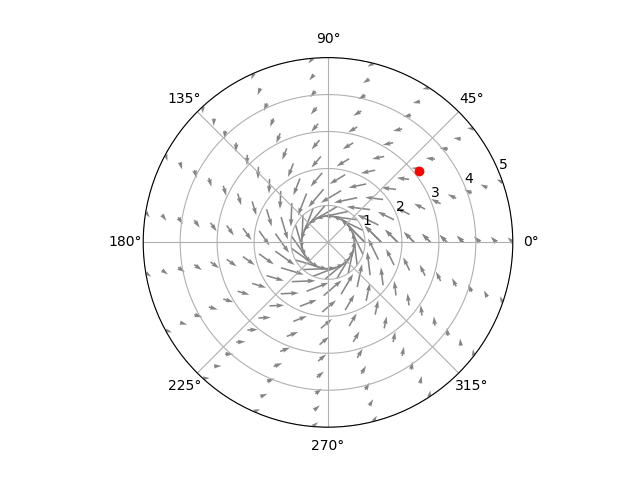

In [25]:
# Graficación
f,a = plt.subplots(1,1,subplot_kw=dict(polar=True))
a.quiver(THETA,
         R,
         vr * np.cos(THETA) - vt * np.sin(THETA),
         vr * np.sin(THETA) + vt * np.cos(THETA),
         color='#848587')
a.set_ylim(0,5)

cols = ['r','theta','phi','psi']
lst = []
def onclick(event):
    psi = (-sigma/(2*np.pi))*event.xdata-Gamma*np.log(event.ydata)
    phi = (-sigma/(2*np.pi))*np.log(event.ydata) + Gamma*event.xdata
    a.plot(event.xdata,event.ydata,'ro')
    a.plot((-psi*2*np.pi/sigma)*np.ones(r.shape)-(Gamma*2*np.pi/q)*np.log(r),r,'#f49b42')
    a.plot((phi/Gamma)+(sigma/(2*np.pi*Gamma))*np.log(r),r,'-b')
    lst.append([event.ydata,event.xdata,phi,psi])
f.canvas.mpl_connect('button_press_event', onclick)
f.show()

In [55]:
output = pd.DataFrame(lst,columns=cols)
display(output)

,r,theta,phi,psi


### Flujo alrededor de un cilindro
El escurrimiento alrededor de un cilindro puede representarse a través de la adición de un flujo uniforme y un dipolo. Las expresiones que representativas resultan, entonces:

$$ \psi = \psi_{\text{uniforme}} + \psi_{\text{dipolo}} = U_{0} y -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2} $$

$$ \phi = \phi_{\text{uniforme}} + \phi_{\text{dipolo}} = U_{0} y +\frac{\kappa}{2\pi}\frac{x}{x^2+y^2} $$

$$ u = u_{\text{uniforme}} + u_{\text{dipolo}} = U_{0} -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2} $$

$$ v = v_{\text{uniforme}} + v_{\text{dipolo}} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

In [38]:
# Constantes
U0 = 1
kappa = 5

In [39]:
# Definición del campo de velocidades
# Generación de la grilla de graficación
x=np.linspace(-5,5,100000); y=np.linspace(-5,5,100000)
xg=np.linspace(-5,5,240); yg=np.linspace(-5,5,240)
X,Y=np.meshgrid(xg,yg)

# Cálculo del campo de velocidades
u = U0 + (- kappa / (2 * np.pi) * ((X**2) - (Y**2)) / ((X )**2 + (Y )**2)**2)
v = (- kappa / (2 * np.pi) * 2 * (X ) * (Y ) / ((X )**2 + (Y )**2)**2)

<IPython.core.display.Javascript object>


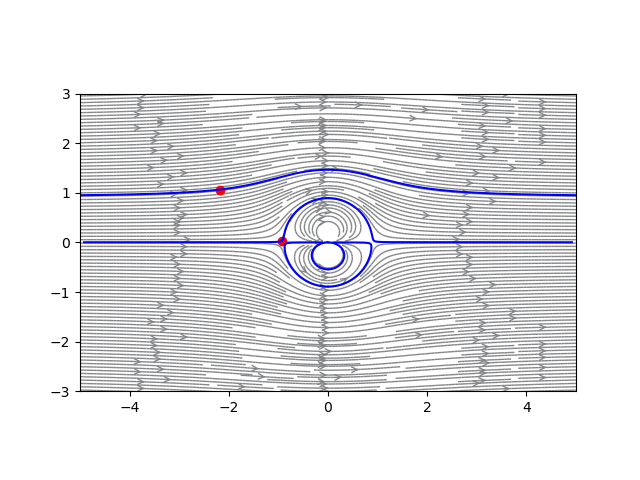

In [40]:
# Graficación
f,a = plt.subplots()
a.axis([-5, 5, -3, 3])
a.set_aspect('equal')
a.streamplot(X,Y,u,v,
            density = 5,
             linewidth = 1,
             arrowstyle = '->',
             color='#848587')

output = []
def onclick(event):
    psi = U0*event.ydata +(- kappa / (2 * np.pi) ) * (event.ydata / (event.xdata**2 + event.ydata**2))
    output.append([event.xdata, event.ydata, psi])
    a.plot(event.xdata,event.ydata,'ro')
    a.plot(-np.sqrt( - y**2 - ( kappa /(2 * np.pi)) * (y / (psi-U0*y))),y, '-b')
    a.plot(+np.sqrt( - y**2 - ( kappa /(2 * np.pi)) * (y / (psi-U0*y))),y, '-b')
f.canvas.mpl_connect('button_press_event', onclick)
f.show()

#### Actividad
1. Setear los siguientes valores para las constantes: $ U_0 = 1 $ y $\kappa = 5$.
2. Iniciar el gráfico interactivo de las líneas de corriente para el flujo uniforme alrededor de un dipolo.
3. Graficar la línea de corriente que pasa por el punto $x=-0.89$ e $y=0$
4. ¿Que figura geométrica puede distinguir alrededor del origen?
5. ¿Cómo se denomina el punto seleccionado? ¿Existe otro punto que pueda considerarse equivalente?

#### Resolución
El punto inducado es un **punto de estancamiento**. Los puntos de estancamiento son los pares $x_i , y_i$ en los que la velocidad es nula. En este caso:

$$x_i = \pm \sqrt{\frac{\kappa}{2 \pi U_0}} \quad \text{y} \quad y_i = 0$$

De modo que para $\kappa = 5$ y $U_0 = 1$,

$$x_1 = \sqrt{\frac{5}{2 \pi}} \approx 0.89 \quad \text{;} \quad y_i = 0$$
$$x_2 = -\sqrt{\frac{5}{2 \pi}} \approx -0.89 \quad \text{;} \quad y_i = 0$$

Puede apreciarse en el gráfico siguiente que el la composición movimientos simples propuesta puede representar el escurrimiento alrededor de un cilindro si se asume que el área interior a la línea de corriente que pasa por los puntos de estancamiento se considera como un sólido.

La línea de corriente considerada como perìmetro del cilindro puede obtenerse a partir de reemplazar los puntos de estancamiento en la ecuación obtenida anteriormente. Fácilmente puede observarse que corresponde a $\psi = 0$.

In [59]:
# Cálculo de los puntos de estancamiento
# calculate the stagnation points
x_1, y_1 = +np.sqrt(kappa / (2 * np.pi * U0)), 0
x_2, y_2 = -np.sqrt(kappa / (2 * np.pi * U0)), 0

<IPython.core.display.Javascript object>


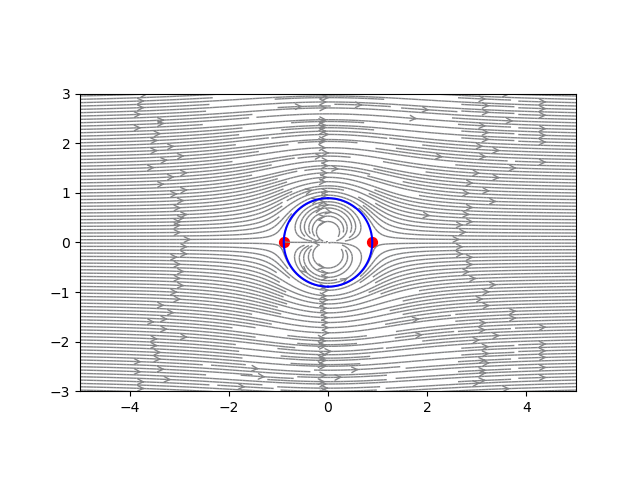

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


In [60]:
# Graficación
f,a = plt.subplots()
a.axis([-5, 5, -3, 3])
a.set_aspect('equal')
a.streamplot(X,Y,u,v,
            density = 5,
             linewidth = 1,
             arrowstyle = '->',
             color='#848587')

# Puntos de estancamiento
a.scatter([x_1, x_2], [y_1, y_2],color='r', s=50, marker='o');

psi = 0
a.plot(-np.sqrt( - y**2 - ( kappa /(2 * np.pi)) * (y / (psi-U0*y))),y, '-b')
a.plot(+np.sqrt( - y**2 - ( kappa /(2 * np.pi)) * (y / (psi-U0*y))),y, '-b')


El siguiente código ejecuta los estilos de la presente notebook. El archivo fue tomado del proyecto [CFD Python](https://github.com/barbagroup/CFDPython) del [Lorena Barba Group](http://lorenabarba.com/).

In [61]:
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()